In [115]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn import metrics

In [116]:
irisDs = datasets.load_iris()
data = irisDs.data
target = irisDs.target

In [117]:
pca = PCA(n_components = 2) # bidimensional
reducedData = pca.fit_transform(data)

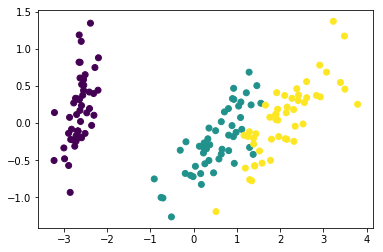

In [118]:
plt.scatter(reducedData[:,0],reducedData[:,1], c = target)
plt.show()

In [119]:
kmeans = KMeans(n_clusters = 3) # porque sabemos que temos tres valores de target
kmeans.fit(reducedData)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [120]:
kMeansPrediction = kmeans.predict(reducedData)

In [121]:
completeness_score = metrics.completeness_score(target, kMeansPrediction)
homogeneity_score = metrics.homogeneity_score(target, kMeansPrediction)

print('Completeness for kMeans with 3 clusters: {0}'.format(completeness_score))
print('Homogeneity for kMeans with 3 clusers: {0}'.format(homogeneity_score))

Completeness for kMeans with 3 clusters: 0.7474865805095325
Homogeneity for kMeans with 3 clusers: 0.736419288125285


In [122]:
agglomerative = AgglomerativeClustering(n_clusters = 3)

In [123]:
agglomerativePrediction = agglomerative.fit_predict(reducedData)

In [124]:
completeness_score = metrics.completeness_score(target, agglomerativePrediction)
homogeneity_score = metrics.homogeneity_score(target, agglomerativePrediction)

print('Completeness for agglomerativeClustering with 3 clusters: {0}'.format(completeness_score))
print('Homogeneity for agllomerativeClustering with 3 clusers: {0}'.format(homogeneity_score))

Completeness for agglomerativeClustering with 3 clusters: 0.7859016861703575
Homogeneity for agllomerativeClustering with 3 clusers: 0.7695955651465263


In [125]:
def elbow(data, target, limit):
    sqErrorList = []
    for i in range(1, limit):
        toFitData = list(data)
        kmeans = KMeans(n_clusters = i)
        kmeans.fit(toFitData)
        predictions = kmeans.predict(data)
        error = metrics.mean_squared_error(target, predictions)
        sqErrorList.append(error)
    return sqErrorList

In [126]:
errors = elbow(reducedData, target, 11) # testes de 1 a 10 clusters

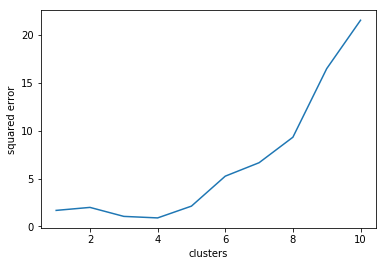

In [127]:
plt.plot(range(1, 11), errors)
plt.xlabel('clusters')
plt.ylabel('squared error')
plt.show()

In [128]:
# testes com os dois melhores valores para os clusters: 3 e 4

kmeans = KMeans(n_clusters = 3)
kmeans.fit(reducedData)

kMeansPrediction = kmeans.predict(reducedData)

completeness_score = metrics.completeness_score(target, kMeansPrediction)
homogeneity_score = metrics.homogeneity_score(target, kMeansPrediction)

print('Completeness for kMeans with 3 clusters: {0}'.format(completeness_score))
print('Homogeneity for kMeans with 3 clusers: {0}\n'.format(homogeneity_score))

kmeans = KMeans(n_clusters = 4)
kmeans.fit(reducedData)

kMeansPrediction = kmeans.predict(reducedData)

completeness_score = metrics.completeness_score(target, kMeansPrediction)
homogeneity_score = metrics.homogeneity_score(target, kMeansPrediction)

print('Completeness for kMeans with 4 clusters: {0}'.format(completeness_score))
print('Homogeneity for kMeans with 4 clusers: {0}'.format(homogeneity_score))

Completeness for kMeans with 3 clusters: 0.7474865805095324
Homogeneity for kMeans with 3 clusers: 0.7364192881252849

Completeness for kMeans with 4 clusters: 0.6370263403041437
Homogeneity for kMeans with 4 clusers: 0.7803356010612768
